In [1]:
#/usr/bin/env python3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Format the dataframe and merge the three hospitals
pd.set_option('display.max_columns', 8)

general = pd.read_csv('general.csv')
prenatal = pd.read_csv('prenatal.csv', header=0, names=general.columns)
sports = pd.read_csv('sports.csv', header=0, names=general.columns)
df = pd.concat([general, prenatal, sports], ignore_index=True)

In [3]:
# remove the unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

# standardize gender descriptions
df['gender'].replace(['female', 'woman'], 'f', inplace=True)
df['gender'].replace(['male', 'man'], 'm', inplace=True)

# set all prenatal patients to female
df.loc[df.hospital == 'prenatal', 'gender'] = 'f'

# drop all empty rows and fill the rest of missing values with 0
df.dropna(how='all', inplace=True)
df.fillna(0, inplace=True)


### Histogram of Ages

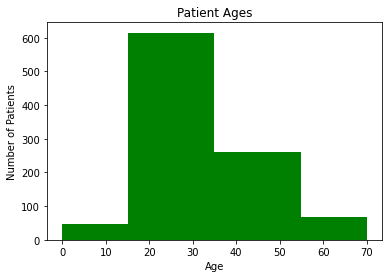

In [4]:
ages_bin = [0, 15, 35, 55, 70]
plt.hist(df['age'], color='green', bins=ages_bin)
plt.title('Patient Ages')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.show()

15-35 year-olds are the most common age group

### Pie Chart of Diagnoses

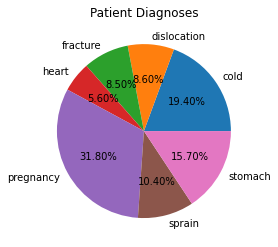

In [5]:
diagnoses = df.groupby(['diagnosis'])['diagnosis'].count()
plt.pie(diagnoses, labels=list(diagnoses.index), autopct='%.2f%%')
plt.title('Patient Diagnoses')
plt.show()

The plurality of patients are in for pregnancy, while cold, followed by stomach problems, are the most common illness related visits.

### Violin Plot of Patient Heights

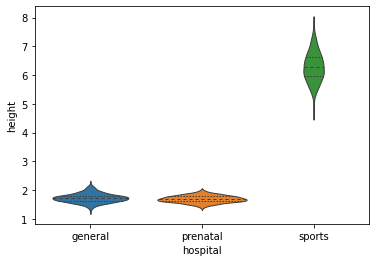

In [6]:
sns.violinplot(data=df, x='hospital', y='height', inner='quart', linewidth=1)
plt.show()

There is a clear disparity between the sports hospital and the others. Examining the original datasets, it seems clear the sports hospital measured height in feet, rather than meters. Let's try to fix that.

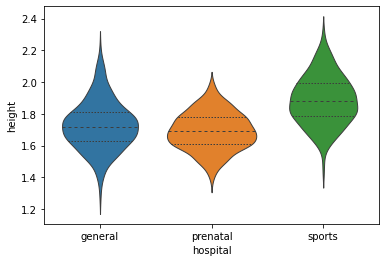

In [7]:
df.loc[df.hospital == 'sports', 'height'] *= round(0.3048, 2)
sns.violinplot(data=df, x='hospital', y='height', inner='quart', linewidth=1)
plt.show()

The sports hospital is overall a bit taller in height.

### Let's answer some more questions about the dataset

#### Hospital with the most patients:

In [8]:
df.hospital.mode()[0]

'general'

#### What ratio of patients in the general hospital suffer from stomach-related illness?

In [9]:
round(df.loc[df.hospital == 'general', 'diagnosis'].value_counts()['stomach']
                           / df.hospital.value_counts()['general'], 3)

0.325

#### What ratio of patients in the sports hospital suffer from dislocation-related injuries?

In [10]:
round(df.loc[df.hospital == 'sports', 'diagnosis'].value_counts()['dislocation']
                               / df.hospital.value_counts()['sports'], 3)

0.285

#### What is the difference between the median ages of patients in the general and sports hospitals?

In [11]:
round(df.loc[df.hospital == 'general', 'age'].median() - df.loc[df.hospital == 'sports', 'age'].median())

19

### Which hospital had blood taken the most often? How many blood tests?

In [12]:
df_group = (df.groupby('hospital')['blood_test'].value_counts().idxmax()[0])
df_group

'prenatal'

In [13]:
df.loc[df.hospital == df_group, 'blood_test'].value_counts()['t']

325